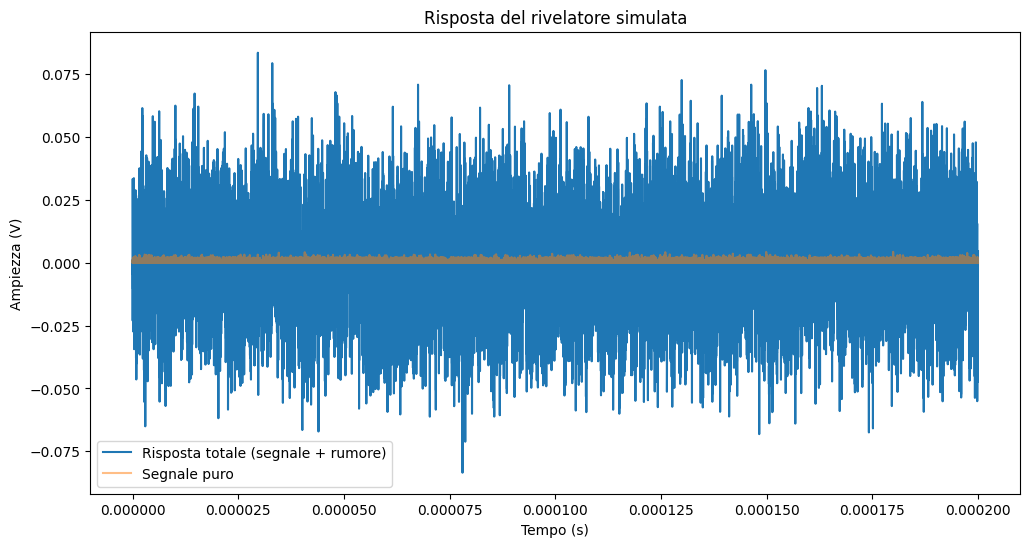

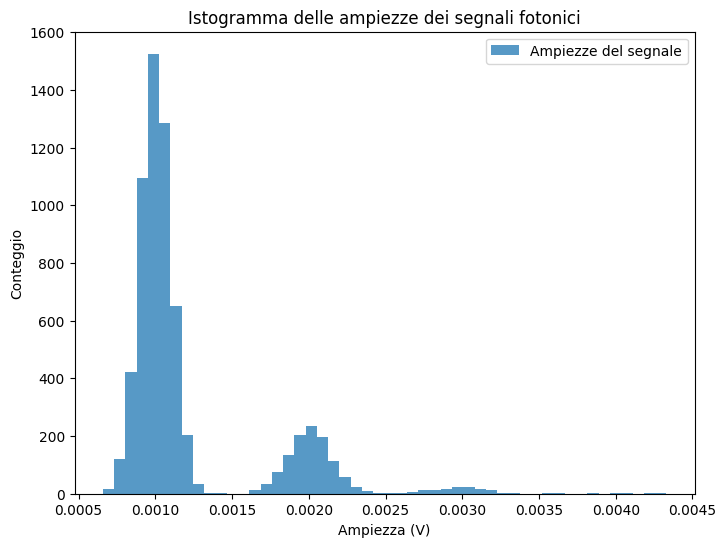

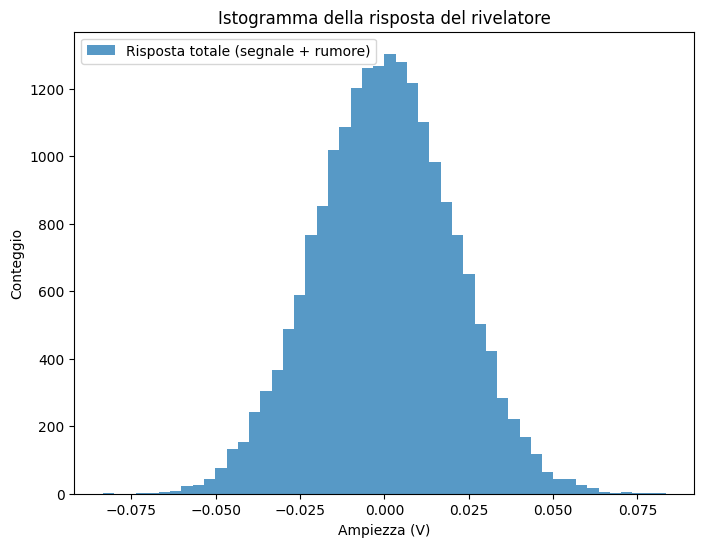

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import ifft

# Parametri di simulazione
E_photon = 0.8  # Energia del fotone in eV (non usato direttamente)
A_single_photon = 5.32e-13  # Ampiezza media del segnale per un singolo fotone in V
N_photons_per_pulse = 1.88e9  # Numero di fotoni per impulso
N_pulses = 8000   # Numero di impulsi simulati
time = 0.0002     # Tempo di simulazione in secondi (0.2 ms)
sampling_rate = 1e8  # Frequenza di campionamento in Hz (100 MHz)
N = 20000         # Numero di punti (dato il tempo e la frequenza di campionamento)
t = np.linspace(0, time, N)

frequencies = np.fft.fftfreq(N, d=1/sampling_rate)
psd = np.genfromtxt('PSD.txt')

# Simulazione del rumore tramite PSD
random_phases = np.exp(2j * np.pi * np.random.rand(N))
noise_fft = random_phases * np.sqrt(psd * N / 2)
noise = np.fft.ifft(noise_fft).real

# Generazione del segnale da impulsi fotonici
signals = np.zeros(N)

for _ in range(N_pulses):
    arrival_time = np.random.uniform(0, time)
    arrival_index = int(arrival_time * sampling_rate)
    if arrival_index < N:  # Assicurati che l'indice sia all'interno dei limiti
        # Somma l'ampiezza corrispondente al numero di fotoni per impulso
        signals[arrival_index] += np.random.normal(N_photons_per_pulse * A_single_photon, 
                                                   N_photons_per_pulse * A_single_photon * 0.1)

# Risposta totale (segnale + rumore)
response = signals + noise

# Plot della risposta temporale simulata
plt.figure(figsize=(12, 6))
plt.plot(t, response, label='Risposta totale (segnale + rumore)')
plt.plot(t, signals, label='Segnale puro', alpha=0.5)
plt.xlabel('Tempo (s)')
plt.ylabel('Ampiezza (V)')
plt.legend()
plt.title('Risposta del rivelatore simulata')
plt.show()

# Istogramma delle ampiezze di picco
peaks = signals[signals > 0]
plt.figure(figsize=(8, 6))
plt.hist(peaks, bins=50, alpha=0.75, label='Ampiezze del segnale')
plt.xlabel('Ampiezza (V)')
plt.ylabel('Conteggio')
plt.title('Istogramma delle ampiezze dei segnali fotonici')
plt.legend()
plt.show()

# Istogramma della risposta totale
plt.figure(figsize=(8, 6))
plt.hist(response, bins=50, alpha=0.75, label='Risposta totale (segnale + rumore)')
plt.xlabel('Ampiezza (V)')
plt.ylabel('Conteggio')
plt.title('Istogramma della risposta del rivelatore')
plt.legend()
plt.show()
